# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


In [7]:
temp.describe

<bound method NDFrame.describe of          City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000>

#### Select the rows where state is New York

In [8]:
df2 = temp[temp['State'] =='New York']
df2

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [9]:
df2.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [10]:
filtrado = temp.loc[(temp["Temperature"] >15)]
filtrado

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [11]:
filtrado2 = temp.loc[(temp["Temperature"] <15)]
filtrado2

,City,State,Temperature
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
4,Bridgeport,Connecticut,14.444444


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [12]:
filtrado3 = temp.loc[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]
filtrado3

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [13]:
filtrado4 = temp.groupby('State').agg({'Temperature': [np.mean, np.std]})

In [14]:
filtrado4

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [15]:
emp = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [16]:
type(temp)

pandas.core.frame.DataFrame

In [17]:
emp

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [18]:
emp.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

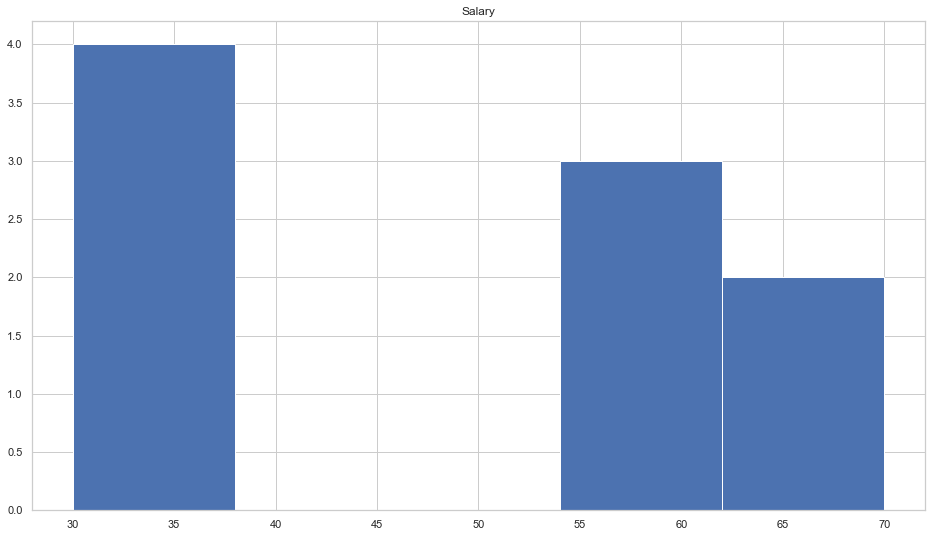

In [19]:
emp.hist("Salary", bins="auto")

#### What's the average salary in this company?

In [20]:
Average = emp.Salary.mean()
Average

48.888888888888886

#### What's the highest salary?

In [21]:
Highest = emp.Salary.max()
Highest

70

#### What's the lowest salary?

In [22]:
Lowest = emp.Salary.min()
Lowest

30

#### Who are the employees with the lowest salary?

In [23]:
Employees = emp.sort_values(by="Salary").head() 
Employees

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
0,Jose,IT,Bachelor,M,analyst,1,35
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [24]:
Maria and David

NameError: name 'Maria' is not defined

#### Could you give all the information about an employee called David?

In [ ]:
David = emp.loc[(emp['Name'] == 'David'),['Name','Department','Education','Gender','Title','Years','Salary']]
David

#### Could you give only David's salary?

In [ ]:
David_salary = emp.loc[(emp['Name'] == 'David'),['Salary']]
David_salary

#### Print all the rows where job title is associate

In [ ]:
Associate = emp.loc[(emp['Title'] == 'associate'),['Name','Department','Education','Gender','Title','Years','Salary']]
Associate

#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [ ]:
emp.head(3)


In [ ]:
emp[0:3]

#### Find the employees who's title is associate and the salary above 55?

In [ ]:
associate_salary = emp.loc[(emp["Salary"] > 55) & (emp["Title"] == "associate"), ["Name", "Department", "Education","Gender","Title","Years","Salary"]]
associate_salary

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [ ]:
filtrado5 = emp.groupby('Years').agg({'Salary': [np.mean]})
filtrado5

####  What is the average Salary per title?

In [ ]:
filtrado6 = emp.groupby('Title').agg({'Salary': [np.mean]})
filtrado6

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

In [ ]:
sns.boxplot(x="Salary", data=emp);

In [ ]:
emp.Salary.quantile(0.25)

In [ ]:
emp.Salary.quantile(0.75)

#### Is the mean salary per gender different?

In [ ]:
sns.boxplot(x="Salary", y="Gender", data=emp);

Yes, they are different. While the average for women is 45, the average for men is 55.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [ ]:
pd.DataFrame(emp.groupby("Department").agg({"Years": [np.mean, np.min, np.max]},{"Salary": [np.mean, np.min, np.max]}))

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [ ]:
emp.groupby('Department').agg({'Salary': np.ptp})

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
orders = pd.read_csv("Orders.zip")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
orders.describe

In [ ]:
orders.head()

In [ ]:
orders['Purchase_Pricer'] = 

####  What is the average Purchase Price?

In [ ]:
orders.UnitPrice.mean()

#### What were the highest and lowest purchase prices? 

In [ ]:
Highest = orders.UnitPrice.max()
Highest

In [ ]:
Lowest = orders.UnitPrice.min()
Lowest

#### Select all the customers we have in Spain

In [ ]:
cust = orders[orders['Country'] =='Spain']
cust

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
cust.shape

We have 2485 customers in Spain.

#### Select all the customers who have bought more than 50 items ?

In [ ]:
cust_50 = cust.loc[(cust["Quantity"] > 50), ["Quantity","CustomerID", "Country","amount_spent"]]
cust_50

#### Select orders from Spain that are above 50 items

In [ ]:
cust_50_l = cust.loc[(cust["Quantity"] < 50), ["Quantity","CustomerID", "Country","amount_spent"]]
cust_50_l

#### Select all free orders

In [ ]:
free = orders[orders.amount_spent ==0]
len(free)

In [ ]:
free.head()

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
lunchbag = orders[orders.Description.str.match(r'.*lunch\sbag.*')==True]
lunchbag

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
one_year = orders[(orders.year == 2011) & (orders.Description.str.match(r'.*lunch\sbag.*')==True)]
one_year

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
def quitaroutliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3-Q1
    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
    
    return [s for s in series if (s>min) and (s<max)]

In [ ]:
nocero = orders[orders.amount_spent != 0]
sns.distplot(quitaroutliers(orders['amount_spent']))

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here